# TS Forecasting with CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Conv1D,MaxPooling1D,Flatten,Dropout

Using TensorFlow backend.


In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('daily-minimum-temperatures-in-me.csv',  parse_dates=['Date'], date_parser=dateparse)

/home/lucas/fundacao/fundacao/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


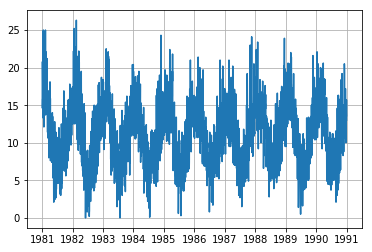

In [4]:
plt.plot(data['Date'],data['Temperatures'])
plt.grid(True)

In [6]:
lag = 10
series = data['Temperatures']
series = np.array(series)

In [7]:
X = []
y = []
for i in range(len(series)-lag):
    xi = []
    for j in range(i,i+lag):
        xi.append(series[j])
    X.append(xi)
    y.append(series[i+lag])

In [8]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(y)*train_size)]
    y_test = y[int(len(y)*train_size):]
    return x_train, x_test, y_train, y_test

In [9]:
X = np.reshape(X,(len(X), len(X[1]), 1))
X_train, X_test, y_train, y_test = split_data(X,y,train_size=0.3)

In [10]:
model = Sequential()
model.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(lag, 1)))
model.add(Conv1D(filters=10, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse')

In [12]:
model.fit(X, y, epochs=100,verbose=0)

In [13]:
pred = model.predict(X_test)

In [14]:
def MAPE(y_test, predict):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - predict[i])/y_test[i])*100
    media_erro = soma/len(y_test)
    return media_erro

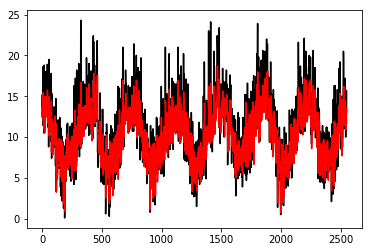

In [15]:
plt.plot(y_test,'k')
plt.plot(pred,'r')

In [16]:
MAPE(y_test, pred)

array([21.54834], dtype=float32)